# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [2]:
import pandas as pd   # 导入数据
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [3]:
# 检查数据维度
data.shape

(112915, 11)

In [4]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [5]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

<ipython-input-5-beec89bb13a8>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [6]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [24]:
# !pip install -U scikit-learn 导入相关的程序包
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sklearn.__version__

'0.24.1'

In [8]:
# 提示：查看train_test_split函数： 这里面70% 是训练集，剩下的是测试集；
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 10), (32595, 10), (76053,), (32595,))

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

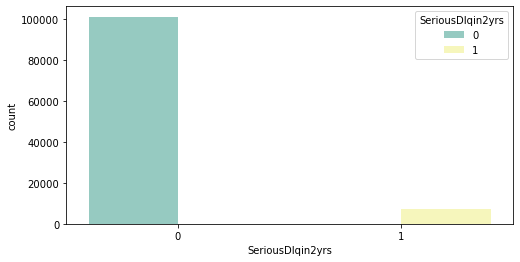

In [9]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts

y.value_counts()

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
plt.figure(figsize=(8,4))
sns.countplot(x="SeriousDlqin2yrs", data=data, hue="SeriousDlqin2yrs", palette="Set3", ) # 灰度柱状图



#### 2.数据预处理之离散化

In [10]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
X_train['age'].describe()


count    76053.000000
mean        51.343129
std         14.437048
min          0.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        103.000000
Name: age, dtype: float64

In [11]:
# 3岁一个bin，也就是总共34个
X_train['age'] = pd.cut(X_train['age'],34)
X_test['age'] = pd.cut(X_test['age'],34)

<ipython-input-11-39d0879eee25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age'] = pd.cut(X_train['age'],34)
<ipython-input-11-39d0879eee25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['age'] = pd.cut(X_test['age'],34)


#### 3.数据预处理之独热向量编码

In [16]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成

X_train_new = pd.get_dummies(X_train,columns=['age'],prefix_sep='_',dummy_na=False,drop_first=False)
X_train_new.head()


,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_(-0.103, 3.029]","age_(3.029, 6.059]","age_(6.059, 9.088]","age_(9.088, 12.118]","age_(12.118, 15.147]","age_(15.147, 18.176]","age_(18.176, 21.206]","age_(21.206, 24.235]","age_(24.235, 27.265]","age_(27.265, 30.294]","age_(30.294, 33.324]","age_(33.324, 36.353]","age_(36.353, 39.382]","age_(39.382, 42.412]","age_(42.412, 45.441]","age_(45.441, 48.471]","age_(48.471, 51.5]","age_(51.5, 54.529]","age_(54.529, 57.559]","age_(57.559, 60.588]","age_(60.588, 63.618]","age_(63.618, 66.647]","age_(66.647, 69.676]","age_(69.676, 72.706]","age_(72.706, 75.735]","age_(75.735, 78.765]","age_(78.765, 81.794]","age_(81.794, 84.824]","age_(84.824, 87.853]","age_(87.853, 90.882]","age_(90.882, 93.912]","age_(93.912, 96.941]","age_(96.941, 99.971]","age_(99.971, 103.0]"
64329,0.116959,0.0,0.326024,3100.0,7.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70087,0.050666,0.0,0.177182,10000.0,9.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
77642,0.038865,0.0,0.016600,5722.0,7.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6017,0.023513,0.0,0.266260,10500.0,8.0,0.0,2.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106521,0.039350,0.0,0.195179,1700.0,3.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [15]:

X_test_new = pd.get_dummies(X_test,columns=['age'],prefix_sep='_',dummy_na=False,drop_first=False)
X_test_new.head()


,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_(20.92, 23.353]","age_(23.353, 25.706]","age_(25.706, 28.059]","age_(28.059, 30.412]","age_(30.412, 32.765]","age_(32.765, 35.118]","age_(35.118, 37.471]","age_(37.471, 39.824]","age_(39.824, 42.176]","age_(42.176, 44.529]","age_(44.529, 46.882]","age_(46.882, 49.235]","age_(49.235, 51.588]","age_(51.588, 53.941]","age_(53.941, 56.294]","age_(56.294, 58.647]","age_(58.647, 61.0]","age_(61.0, 63.353]","age_(63.353, 65.706]","age_(65.706, 68.059]","age_(68.059, 70.412]","age_(70.412, 72.765]","age_(72.765, 75.118]","age_(75.118, 77.471]","age_(77.471, 79.824]","age_(79.824, 82.176]","age_(82.176, 84.529]","age_(84.529, 86.882]","age_(86.882, 89.235]","age_(89.235, 91.588]","age_(91.588, 93.941]","age_(93.941, 96.294]","age_(96.294, 98.647]","age_(98.647, 101.0]"
107294,0.128706,0.0,0.790269,4500.0,24.0,0.0,4.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39317,0.108896,0.0,0.159920,2000.0,12.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
40606,0.153372,0.0,0.375656,4000.0,9.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68931,0.067802,0.0,0.297658,16696.0,13.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20745,0.399198,0.0,0.223816,17500.0,16.0,0.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 4.数据预处理之幅度缩放

In [22]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train_new)
X_test_std = sc.fit_transform(X_test_new)


In [25]:
# Check
print(sc.mean_, sc.scale_)

np.mean(X_train_std, axis=0), np.std(X_train_std, axis=0)

[5.38486146e+00 3.70455591e-01 3.07047359e-01 6.96687854e+03
 8.67691364e+00 2.07915324e-01 1.02322442e+00 1.81438871e-01
 8.54609603e-01 8.03804264e-03 1.19650253e-02 2.94523700e-02
 2.57094646e-02 3.00046019e-02 4.72771898e-02 3.44224574e-02
 3.95766222e-02 6.70041417e-02 4.63568032e-02 4.89338856e-02
 7.86010124e-02 4.94554380e-02 4.87498083e-02 7.12072404e-02
 4.45773892e-02 6.66359871e-02 4.65102010e-02 3.51587667e-02
 4.57738917e-02 2.15370456e-02 1.96349133e-02 2.35618960e-02
 1.43887099e-02 1.26092959e-02 1.40819144e-02 5.21552385e-03
 5.03144654e-03 5.06212609e-03 1.99417089e-03 9.51066114e-04
 4.29513729e-04 6.13591042e-05 3.06795521e-05] [2.24966438e+02 3.40749717e+00 2.23236097e-01 1.26307442e+04
 5.12798786e+00 3.37706529e+00 1.09072171e+00 3.35648489e+00
 1.14222523e+00 8.92940788e-02 1.08728393e-01 1.69070778e-01
 1.58267141e-01 1.70599900e-01 2.12231141e-01 1.82311689e-01
 1.94962338e-01 2.50029172e-01 2.10256629e-01 2.15729832e-01
 2.69115019e-01 2.16816968e-01 2.15344

(array([-3.73709248e-18,  2.25159822e-17, -2.42537302e-16,  2.57392244e-17,
         2.70939205e-17,  1.08842818e-17, -3.19521407e-17, -8.40845808e-18,
         1.21455506e-17,  2.24225549e-18,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.79249334e-18,
        -3.40075416e-17, -3.15317178e-19,  3.01770218e-17,  7.67972504e-17,
         4.61530921e-17,  2.53188015e-17,  5.23192947e-18, -4.24159996e-17,
         3.04573037e-17,  8.96902195e-18,  2.33568280e-17, -1.97131628e-17,
         1.41075241e-17,  7.43681403e-17,  5.87657792e-17,  8.87559464e-19,
         3.41943962e-17, -3.68103609e-17,  2.59727927e-17,  4.29765635e-17,
         3.17652861e-17,  2.36838236e-17, -1.38272422e-17, -2.54122289e-17,
        -1.01835770e-17,  7.94132152e-19,  1.00434360e-18]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.,

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [31]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100,random_state=0)
lr.fit(X_train_std, y_train)
print("Coefficients:", lr.coef_)

Coefficients: [[-0.01425331  1.72101988  0.31117862 -0.12653107 -0.09465455  1.68105196
  -0.1952758  -3.22810155  0.11059459 -0.04541742  0.          0.
   0.          0.          0.         -0.03305529  0.06562408  0.10819155
   0.12815526  0.09389143  0.09525581  0.04511346  0.07707244  0.03997392
   0.04867878  0.03762164  0.03348991 -0.02011729 -0.02832893 -0.07639174
  -0.11081871 -0.15690812 -0.079248   -0.10698702 -0.10460597 -0.10306159
  -0.04700532 -0.05262482 -0.01043748 -0.01124111 -0.21451226  0.00887274
  -0.06675963]]


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [43]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# 创建逻辑回归模型实例
lr= LogisticRegression(solver='liblinear')  # 对于L1正则化，需要选择适合的求解器，如'liblinear'

# 定义要搜索的参数网格
param_grid = {
    'penalty': ['l1', 'l2'],  # 正则化类型
    'C': [1, 10, 100, 500]    # 正则化强度的倒数
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', refit=True)

# 执行网格搜索
grid_search.fit(X_train_new, y_train)

# 输出最佳参数
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# 输出最好的超参数
# 输出最好的模型
# 使用最佳参数在整个训练集上重新训练模型
best_model = grid_search.best_estimator_

# 可选：使用最佳模型在测试集上进行预测和评估
y_test_pred = best_model.predict(X_test_new)
print('Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))




Best parameters:  {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.93
Test accuracy: 0.9338


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [38]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score

# 使用最佳模型在测试集上进行预测
y_test_pred = best_model.predict(X_test_new)
y_test_prob = best_model.predict_proba(X_test_new)[:, 1]  # 获取正类的预测概率，用于计算AUC

# 计算各种测试指标
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_prob)
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# 打印测试指标
print("Accuracy:",accuracy)
print("Recall",recall)
print("AUC",auc)
print("Confusion Matrix \n", conf_matrix)
print("F1 Score",f1)


Accuracy: 0.9337935266145114
Recall 0.03408567480423768
AUC 0.6914670022805579
Confusion Matrix 
 [[30363    61]
 [ 2097    74]]
F1 Score 0.06418039895923677


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [48]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标


from sklearn.preprocessing import binarize

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for thresh in thresholds:
    lr = LogisticRegression(C=100,random_state=0)
    lr.fit(X_train_std, y_train)
    y_pred_prob =lr.predict_proba(X_test_std)[:,1]
    y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold=thresh)[:,0]
    print ('thresh='+str(thresh))
    print('Accuracy Score', accuracy_score(y_test,y_pred_class))
    print('AUC',roc_auc_score(y_test,y_pred_class))
    print('confusion matrix \n',confusion_matrix(y_test,y_pred_class))
    print('Recall Score',recall_score(y_test,y_pred_class))
    print('F1 Score',f1_score(y_test, y_pred_class))
    print('\n')


thresh=0.1
Accuracy Score 0.8557754256787851
AUC 0.6474857935981837
confusion matrix 
 [[27010  3414]
 [ 1287   884]]
Recall Score 0.40718562874251496
F1 Score 0.2733034472097697


thresh=0.2
Accuracy Score 0.926491793219819
AUC 0.575007974201075
confusion matrix 
 [[29831   593]
 [ 1803   368]]
Recall Score 0.1695071395670198
F1 Score 0.23499361430395915


thresh=0.3
Accuracy Score 0.9328117809479981
AUC 0.5484510685944198
confusion matrix 
 [[30177   247]
 [ 1943   228]]
Recall Score 0.1050207277752188
F1 Score 0.17233560090702948


thresh=0.4
Accuracy Score 0.9336708084061973
AUC 0.5305180487343443
confusion matrix 
 [[30291   133]
 [ 2029   142]]
Recall Score 0.0654076462459696
F1 Score 0.116107931316435


thresh=0.5
Accuracy Score 0.9337935266145114
AUC 0.5216010690849535
confusion matrix 
 [[30337    87]
 [ 2071   100]]
Recall Score 0.046061722708429294
F1 Score 0.08481764206955046


thresh=0.6
Accuracy Score 0.9338548857186685
AUC 0.5139344659656193
confusion matrix 
 [[30375   

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [49]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(lr,prefit=True)
X_train_std_selected=sfm.transform(X_train_std)
lr_selected = LogisticRegression(C=10,solver='saga', penalty='l1',random_state=0,n_jobs=-1)
lr_selected.fit(X_train_std_selected, y_train)


LogisticRegression(C=10, n_jobs=-1, penalty='l1', random_state=0, solver='saga')

In [50]:
lr_pred=lr_selected.predict(X_train_std_selected)
print('Accuracy Score',accuracy_score(y_train,lr_pred))
print('AUC',roc_auc_score(y_train,lr_pred))
print('Confusion matrix \n',confusion_matrix(y_train,lr_pred))
print('Recall Score',recall_score(y_train,lr_pred))
print('F1 Score',f1_score(y_train, lr_pred,average='macro'))

Accuracy Score 0.9331913271008375
AUC 0.5202189172521697
Confusion matrix 
 [[70753   145]
 [ 4936   219]]
Recall Score 0.04248302618816683
F1 Score 0.5223500968530627


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [56]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', 
                                n_estimators=10, # The number of trees in the forest.
                                random_state=0,
                                n_jobs=-1)
rf.fit(X_train_std, y_train)
sfm=SelectFromModel(rf,prefit=True)
X_train_std_selected=sfm.transform(X_train_std)
rf.fit(X_train_std_selected, y_train)
f_pred=rf.predict(X_train_std_selected)
print('Accuracy Score',accuracy_score(y_train,f_pred))
print('Recall Score',recall_score(y_train,f_pred))
print('F1 Score',f1_score(y_train, f_pred))


Accuracy Score 0.989928076472986
Recall Score 0.8545101842870999
F1 Score 0.9200083542188805
